In [62]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


###Dataset: StudPgmStateDistrict 2018-19.xlsx

In [63]:
# Load StudPgmStateDistrict 2018-19.xls
stu_pgm_st_dist_rd = pd.read_excel(io='/content/drive/MyDrive/da_tech_proj/StudPgmStateDistrict 2018-19.xlsx', sheet_name ='StudPgmStateDistrict19state')

In [64]:
# copy dataframes for transformations
stu_pgm_st_dist_orig = stu_pgm_st_dist_rd.copy()

In [65]:
 # drop columns
stu_pgm_st_dist_rd.drop(['DISTRICT NUMBER','SCOPE', 'AGGREGATION LEVEL', 'CHARTER STATUS'], axis = 1, inplace = True)

In [66]:
# display first 3 columns after columns were dropped
stu_pgm_st_dist_rd.head(5)

,YEAR,DISTRICT NAME,REGION,ALL ENROLLMENT,AT RISK,BILINGUAL,CTE,DYSLEXIC,ECONOMICALLY DISADVANTAGED,EMERGENT BILINGUAL/ENGLISH LEARNER,ESL,FOSTER CARE,GIFTED & TALENTED,HOMELESS,MILITARY CONNECTED,SPECIAL EDUCATION,TITLE I
0,2018-2019,A W BROWN LEADERSHIP ACADEMY,10.0,2084.0,256.0,0.0,0.0,23.0,1318.0,10.0,10.0,-999.0,0.0,11.0,0.0,99.0,2084.0
1,2018-2019,A+ ACADEMY,10.0,1409.0,912.0,283.0,424.0,34.0,1270.0,702.0,407.0,-999.0,32.0,-999.0,-999.0,132.0,1409.0
2,2018-2019,A+ UNLIMITED POTENTIAL,4.0,180.0,128.0,0.0,0.0,-999.0,127.0,17.0,-999.0,0.0,0.0,-999.0,0.0,33.0,0.0
3,2018-2019,ABBOTT ISD,12.0,277.0,94.0,0.0,123.0,-999.0,70.0,-999.0,-999.0,0.0,-999.0,-999.0,0.0,33.0,277.0
4,2018-2019,ABERNATHY ISD,17.0,780.0,308.0,0.0,258.0,46.0,396.0,15.0,14.0,-999.0,98.0,-999.0,12.0,57.0,780.0


Need to sum the groups by district (rows) but need to exclude -999 for calculation.


In [67]:
# count the number on occurances for -999 values
print(f"At Risk: {stu_pgm_st_dist_rd['AT RISK'].value_counts()[-999]}")
print(f"Bilingual: {stu_pgm_st_dist_rd['BILINGUAL'].value_counts()[-999]}")
print(f"CTE: {stu_pgm_st_dist_rd['CTE'].value_counts()[-999]}")
print(f"Dyslexic: {stu_pgm_st_dist_rd['DYSLEXIC'].value_counts()[-999]}")
print(f"Econonmically Disadvd: {stu_pgm_st_dist_rd['ECONOMICALLY DISADVANTAGED'].value_counts()[-999]}")
print(f"Emergent Bilin/Eng Lrnr: {stu_pgm_st_dist_rd['EMERGENT BILINGUAL/ENGLISH LEARNER'].value_counts()[-999]}")
print(f"ESL: {stu_pgm_st_dist_rd['ESL'].value_counts()[-999]}")
print(f"Foster Care: {stu_pgm_st_dist_rd['FOSTER CARE'].value_counts()[-999]}")
print(f"G&T: {stu_pgm_st_dist_rd['GIFTED & TALENTED'].value_counts()[-999]}")
print(f"Homeless: {stu_pgm_st_dist_rd['HOMELESS'].value_counts()[-999]}")
print(f"Military Conn: {stu_pgm_st_dist_rd['MILITARY CONNECTED'].value_counts()[-999]}")
print(f"Special Ed: {stu_pgm_st_dist_rd['SPECIAL EDUCATION'].value_counts()[-999]}")

At Risk: 11
Bilingual: 11
CTE: 4
Dyslexic: 217
Econonmically Disadvd: 3
Emergent Bilin/Eng Lrnr: 166
ESL: 168
Foster Care: 473
G&T: 155
Homeless: 310
Military Conn: 460
Special Ed: 37


In [68]:
# replace -999 to perform calculations
stu_pgm_st_dist_calc_df = stu_pgm_st_dist_rd.replace(to_replace = -999, value= 0, regex=True)

In [69]:
# display first 5 rows
stu_pgm_st_dist_calc_df.head(5)

,YEAR,DISTRICT NAME,REGION,ALL ENROLLMENT,AT RISK,BILINGUAL,CTE,DYSLEXIC,ECONOMICALLY DISADVANTAGED,EMERGENT BILINGUAL/ENGLISH LEARNER,ESL,FOSTER CARE,GIFTED & TALENTED,HOMELESS,MILITARY CONNECTED,SPECIAL EDUCATION,TITLE I
0,2018-2019,A W BROWN LEADERSHIP ACADEMY,10.0,2084.0,256.0,0.0,0.0,23.0,1318.0,10.0,10.0,0.0,0.0,11.0,0.0,99.0,2084.0
1,2018-2019,A+ ACADEMY,10.0,1409.0,912.0,283.0,424.0,34.0,1270.0,702.0,407.0,0.0,32.0,0.0,0.0,132.0,1409.0
2,2018-2019,A+ UNLIMITED POTENTIAL,4.0,180.0,128.0,0.0,0.0,0.0,127.0,17.0,0.0,0.0,0.0,0.0,0.0,33.0,0.0
3,2018-2019,ABBOTT ISD,12.0,277.0,94.0,0.0,123.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,277.0
4,2018-2019,ABERNATHY ISD,17.0,780.0,308.0,0.0,258.0,46.0,396.0,15.0,14.0,0.0,98.0,0.0,12.0,57.0,780.0


In [70]:
# function for calculating the percentages
def group_percent_of(df, col_a, col_b):
    try:
        return (df[col_a] / df[col_b]) * 100
    except ZeroDivisionError:
        return 0

In [71]:
# calculations for each special population groups
stu_pgm_st_dist_calc_df['%AT RISK'] = group_percent_of(stu_pgm_st_dist_calc_df, 'AT RISK', 'ALL ENROLLMENT')
stu_pgm_st_dist_calc_df['%BILINGUAL'] = group_percent_of(stu_pgm_st_dist_calc_df, 'BILINGUAL', 'ALL ENROLLMENT')   
stu_pgm_st_dist_calc_df['%CTE'] = group_percent_of(stu_pgm_st_dist_calc_df, 'CTE', 'ALL ENROLLMENT')
stu_pgm_st_dist_calc_df['%DYSLEXIC'] = group_percent_of(stu_pgm_st_dist_calc_df, 'DYSLEXIC', 'ALL ENROLLMENT')  
stu_pgm_st_dist_calc_df['%ECONOMICALLY DISADVANTAGED'] = group_percent_of(stu_pgm_st_dist_calc_df, 'ECONOMICALLY DISADVANTAGED', 'ALL ENROLLMENT')
stu_pgm_st_dist_calc_df['%EMERGENT BILINGUAL/ENGLISH LEARNER'] = group_percent_of(stu_pgm_st_dist_calc_df, 'EMERGENT BILINGUAL/ENGLISH LEARNER', 'ALL ENROLLMENT')
stu_pgm_st_dist_calc_df['%ESL'] = group_percent_of(stu_pgm_st_dist_calc_df, 'ESL', 'ALL ENROLLMENT')
stu_pgm_st_dist_calc_df['%FOSTER CARE'] = group_percent_of(stu_pgm_st_dist_calc_df, 'FOSTER CARE', 'ALL ENROLLMENT')
stu_pgm_st_dist_calc_df['%GIFTED & TALENTED'] = group_percent_of(stu_pgm_st_dist_calc_df, 'GIFTED & TALENTED', 'ALL ENROLLMENT')
stu_pgm_st_dist_calc_df['%HOMELESS'] = group_percent_of(stu_pgm_st_dist_calc_df, 'HOMELESS', 'ALL ENROLLMENT')
stu_pgm_st_dist_calc_df['%MILITARY CONNECTED'] = group_percent_of(stu_pgm_st_dist_calc_df, 'MILITARY CONNECTED', 'ALL ENROLLMENT')
stu_pgm_st_dist_calc_df['%SPECIAL EDUCATION'] = group_percent_of(stu_pgm_st_dist_calc_df, 'SPECIAL EDUCATION', 'ALL ENROLLMENT')
stu_pgm_st_dist_calc_df['%TITLE I'] = group_percent_of(stu_pgm_st_dist_calc_df, 'TITLE I', 'ALL ENROLLMENT')


In [72]:
# display dataframe columns
stu_pgm_st_dist_calc_df.columns

Index(['YEAR', 'DISTRICT NAME', 'REGION', 'ALL ENROLLMENT', 'AT RISK',
       'BILINGUAL', 'CTE', 'DYSLEXIC', 'ECONOMICALLY DISADVANTAGED',
       'EMERGENT BILINGUAL/ENGLISH LEARNER', 'ESL', 'FOSTER CARE',
       'GIFTED & TALENTED', 'HOMELESS', 'MILITARY CONNECTED',
       'SPECIAL EDUCATION', 'TITLE I', '%AT RISK', '%BILINGUAL', '%CTE',
       '%DYSLEXIC', '%ECONOMICALLY DISADVANTAGED',
       '%EMERGENT BILINGUAL/ENGLISH LEARNER', '%ESL', '%FOSTER CARE',
       '%GIFTED & TALENTED', '%HOMELESS', '%MILITARY CONNECTED',
       '%SPECIAL EDUCATION', '%TITLE I'],
      dtype='object')

In [73]:
# change datatype from float64 to int
stu_pgm_st_dist_calc_df['REGION'] = stu_pgm_st_dist_calc_df['REGION'].astype(int)

In [74]:
# shape (rows, columns) of dataframe after transformations and before merging datasets
stu_pgm_st_dist_calc_df.shape

(1201, 30)

### Dataset: DISTRATE 2018-2019.xls

In [75]:
# For loading entire dataset
dist_rate_1819_rd_orig = pd.read_excel(io='/content/drive/MyDrive/da_tech_proj/DISTRATE 2018-2019.xls', sheet_name= 'DISTRATE 2018-2019.xls')

In [76]:
# Load DISTRATE 2018-2019.xls - with selected columns
dist_rate_1819_ucol = pd.read_excel(io='/content/drive/MyDrive/da_tech_proj/DISTRATE 2018-2019.xls', sheet_name= 'DISTRATE 2018-2019.xls', usecols=['D_RATING', 'DDALLS', 'REGION'])


In [77]:
# copy dataframe to use for data transformations 
dist_rate_1819 = dist_rate_1819_ucol.copy()

In [78]:
# remove apostrophe from region
dist_rate_1819['REGION'] = dist_rate_1819['REGION'].str.replace("'"," ")

In [79]:
# display first 5 rows
dist_rate_1819.sample(5)

,D_RATING,DDALLS,REGION
535,B,83,04
1046,B,85,14
395,B,85,17
20,B,87,20
831,C,75,09


In [80]:
# dataframe datatypes
dist_rate_1819.dtypes

D_RATING    object
DDALLS      object
REGION      object
dtype: object

In [81]:
# change the datatype from string/object to int
dist_rate_1819['REGION'] = dist_rate_1819['REGION'].astype(int)

In [82]:
# display information about the datframe
dist_rate_1819.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   D_RATING  1201 non-null   object
 1   DDALLS    1201 non-null   object
 2   REGION    1201 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 28.3+ KB


In [83]:
# change datatype, coerce error and fill with 0
dist_rate_1819["DDALLS"] = dist_rate_1819["DDALLS"].apply(pd.to_numeric, errors='coerce').fillna(0.0)

In [84]:
# shape before merging datasets
dist_rate_1819.shape

(1201, 3)

### Join datasets

In [85]:
st_pgm_st_distr_rate1819_df = stu_pgm_st_dist_calc_df.join(dist_rate_1819, how='inner',lsuffix='_left', rsuffix='_right')

In [86]:
# drop extra column 
st_pgm_st_distr_rate1819_df.drop('REGION_right', axis=1, inplace=True)

In [87]:
# display new shape
st_pgm_st_distr_rate1819_df.shape 

(1201, 32)

In [88]:
# display columns of combined dataset
st_pgm_st_distr_rate1819_df.columns

Index(['YEAR', 'DISTRICT NAME', 'REGION_left', 'ALL ENROLLMENT', 'AT RISK',
       'BILINGUAL', 'CTE', 'DYSLEXIC', 'ECONOMICALLY DISADVANTAGED',
       'EMERGENT BILINGUAL/ENGLISH LEARNER', 'ESL', 'FOSTER CARE',
       'GIFTED & TALENTED', 'HOMELESS', 'MILITARY CONNECTED',
       'SPECIAL EDUCATION', 'TITLE I', '%AT RISK', '%BILINGUAL', '%CTE',
       '%DYSLEXIC', '%ECONOMICALLY DISADVANTAGED',
       '%EMERGENT BILINGUAL/ENGLISH LEARNER', '%ESL', '%FOSTER CARE',
       '%GIFTED & TALENTED', '%HOMELESS', '%MILITARY CONNECTED',
       '%SPECIAL EDUCATION', '%TITLE I', 'D_RATING', 'DDALLS'],
      dtype='object')

In [89]:
# check if null values exist in columns
print(st_pgm_st_distr_rate1819_df.isnull().sum())

YEAR                                   0
DISTRICT NAME                          0
REGION_left                            0
ALL ENROLLMENT                         0
AT RISK                                0
BILINGUAL                              0
CTE                                    0
DYSLEXIC                               0
ECONOMICALLY DISADVANTAGED             0
EMERGENT BILINGUAL/ENGLISH LEARNER     0
ESL                                    0
FOSTER CARE                            0
GIFTED & TALENTED                      0
HOMELESS                               0
MILITARY CONNECTED                     0
SPECIAL EDUCATION                      0
TITLE I                                0
%AT RISK                               0
%BILINGUAL                             0
%CTE                                   0
%DYSLEXIC                              0
%ECONOMICALLY DISADVANTAGED            0
%EMERGENT BILINGUAL/ENGLISH LEARNER    0
%ESL                                   0
%FOSTER CARE    

In [90]:
# display columns that do not have missing values
print(st_pgm_st_distr_rate1819_df.columns[st_pgm_st_distr_rate1819_df.notnull().any()].tolist())

['YEAR', 'DISTRICT NAME', 'REGION_left', 'ALL ENROLLMENT', 'AT RISK', 'BILINGUAL', 'CTE', 'DYSLEXIC', 'ECONOMICALLY DISADVANTAGED', 'EMERGENT BILINGUAL/ENGLISH LEARNER', 'ESL', 'FOSTER CARE', 'GIFTED & TALENTED', 'HOMELESS', 'MILITARY CONNECTED', 'SPECIAL EDUCATION', 'TITLE I', '%AT RISK', '%BILINGUAL', '%CTE', '%DYSLEXIC', '%ECONOMICALLY DISADVANTAGED', '%EMERGENT BILINGUAL/ENGLISH LEARNER', '%ESL', '%FOSTER CARE', '%GIFTED & TALENTED', '%HOMELESS', '%MILITARY CONNECTED', '%SPECIAL EDUCATION', '%TITLE I', 'D_RATING', 'DDALLS']


In [91]:
# display datatypes of the merged dataframe
st_pgm_st_distr_rate1819_df.dtypes

YEAR                                    object
DISTRICT NAME                           object
REGION_left                              int64
ALL ENROLLMENT                         float64
AT RISK                                float64
BILINGUAL                              float64
CTE                                    float64
DYSLEXIC                               float64
ECONOMICALLY DISADVANTAGED             float64
EMERGENT BILINGUAL/ENGLISH LEARNER     float64
ESL                                    float64
FOSTER CARE                            float64
GIFTED & TALENTED                      float64
HOMELESS                               float64
MILITARY CONNECTED                     float64
SPECIAL EDUCATION                      float64
TITLE I                                float64
%AT RISK                               float64
%BILINGUAL                             float64
%CTE                                   float64
%DYSLEXIC                              float64
%ECONOMICALLY

#### Run a regression to see how Overall Scaled Score and the percentage of students in each of the special population groups at the district level predict together

In [92]:
# subset of dataframe to display correlation matrix for the heatmap
corr_df_subset = st_pgm_st_distr_rate1819_df[['%AT RISK', '%CTE','%BILINGUAL', '%DYSLEXIC', '%ECONOMICALLY DISADVANTAGED', '%EMERGENT BILINGUAL/ENGLISH LEARNER', '%ESL', 
                                  '%FOSTER CARE', '%GIFTED & TALENTED', '%HOMELESS', '%MILITARY CONNECTED', '%SPECIAL EDUCATION', '%TITLE I', 'DDALLS']]

### Histograms

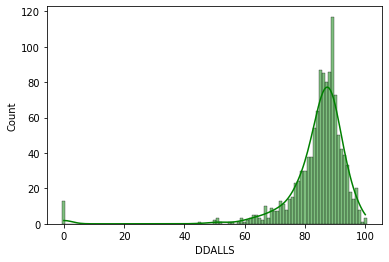

In [93]:
sns.histplot(corr_df_subset['DDALLS'], bins='auto', discrete = True, kde = True, color="green")

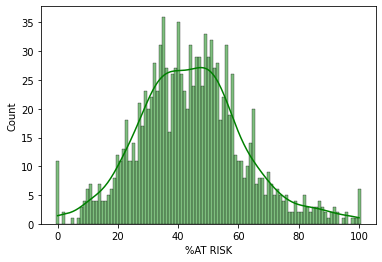

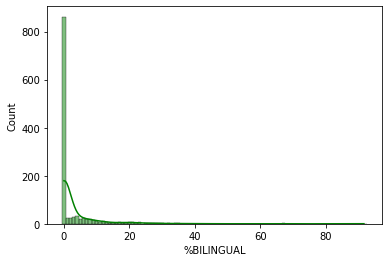

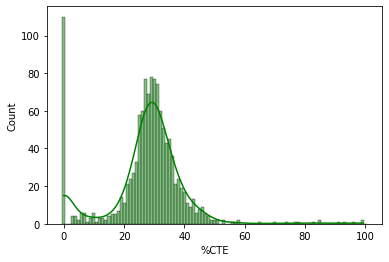

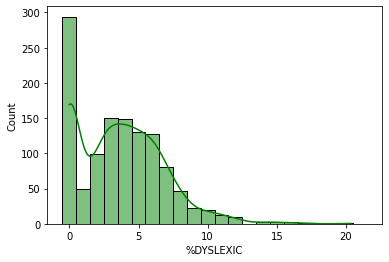

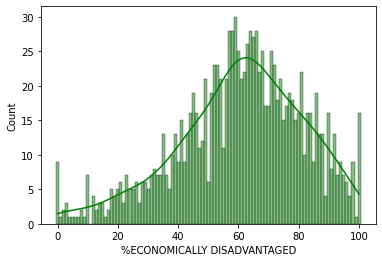

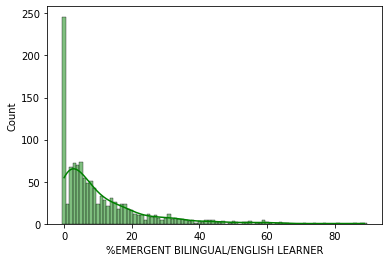

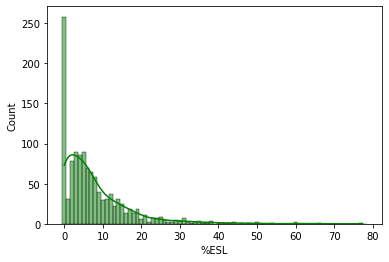

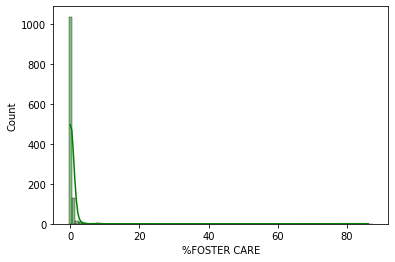

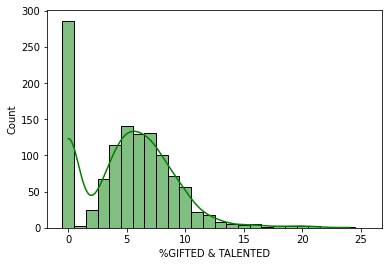

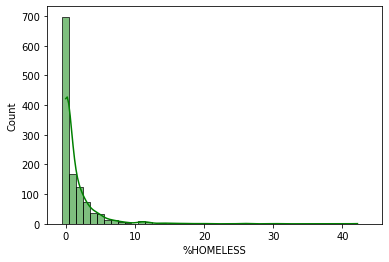

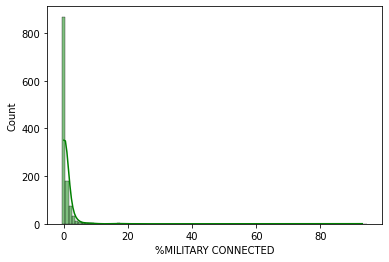

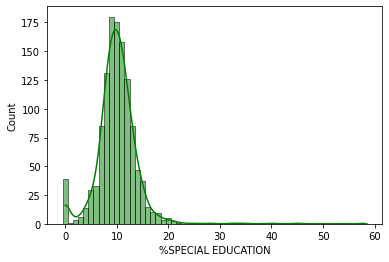

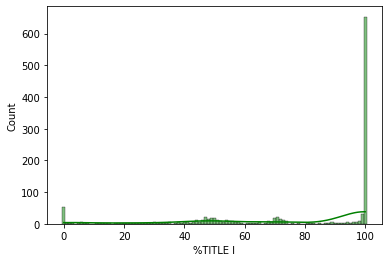

In [94]:
grps =['%AT RISK', '%BILINGUAL', '%CTE','%DYSLEXIC', '%ECONOMICALLY DISADVANTAGED', '%EMERGENT BILINGUAL/ENGLISH LEARNER', '%ESL', 
                                  '%FOSTER CARE', '%GIFTED & TALENTED', '%HOMELESS', '%MILITARY CONNECTED', '%SPECIAL EDUCATION', '%TITLE I']

for grp in grps:
     sns.histplot(data = corr_df_subset[grp], bins='auto', discrete = True, kde = True, color="green")
     plt.show()                                    

Transform Highly Skewed Data

In [95]:
corr_df_subset.skew().sort_values()

DDALLS                                 -4.451149
%TITLE I                               -1.125396
%ECONOMICALLY DISADVANTAGED            -0.495411
%CTE                                    0.241788
%AT RISK                                0.351692
%GIFTED & TALENTED                      0.593509
%DYSLEXIC                               0.776573
%EMERGENT BILINGUAL/ENGLISH LEARNER     2.198434
%SPECIAL EDUCATION                      2.422862
%ESL                                    2.454910
%BILINGUAL                              5.141311
%HOMELESS                               5.449154
%MILITARY CONNECTED                    16.046427
%FOSTER CARE                           17.682938
dtype: float64

In [96]:
corr_df_subset['%FOSTER CARE'] = np.sqrt(corr_df_subset['%FOSTER CARE'])

In [97]:
corr_df_subset['%MILITARY CONNECTED'] = np.sqrt(corr_df_subset['%MILITARY CONNECTED'])

In [98]:
corr_df_subset.skew().sort_values()

DDALLS                                -4.451149
%TITLE I                              -1.125396
%ECONOMICALLY DISADVANTAGED           -0.495411
%CTE                                   0.241788
%AT RISK                               0.351692
%GIFTED & TALENTED                     0.593509
%DYSLEXIC                              0.776573
%EMERGENT BILINGUAL/ENGLISH LEARNER    2.198434
%SPECIAL EDUCATION                     2.422862
%ESL                                   2.454910
%MILITARY CONNECTED                    4.580096
%BILINGUAL                             5.141311
%HOMELESS                              5.449154
%FOSTER CARE                           7.433287
dtype: float64

### Scatter Plots

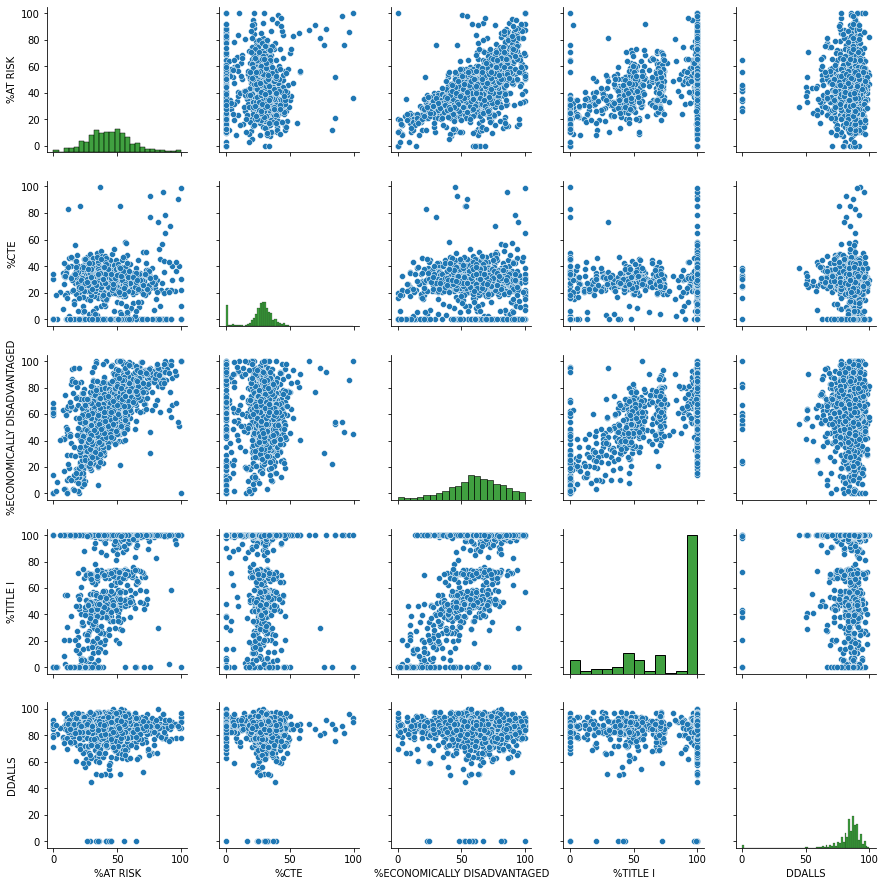

In [99]:
sns.pairplot(corr_df_subset, vars=['%AT RISK', '%CTE','%ECONOMICALLY DISADVANTAGED', '%TITLE I', 'DDALLS'], diag_kws={'color':'green'})

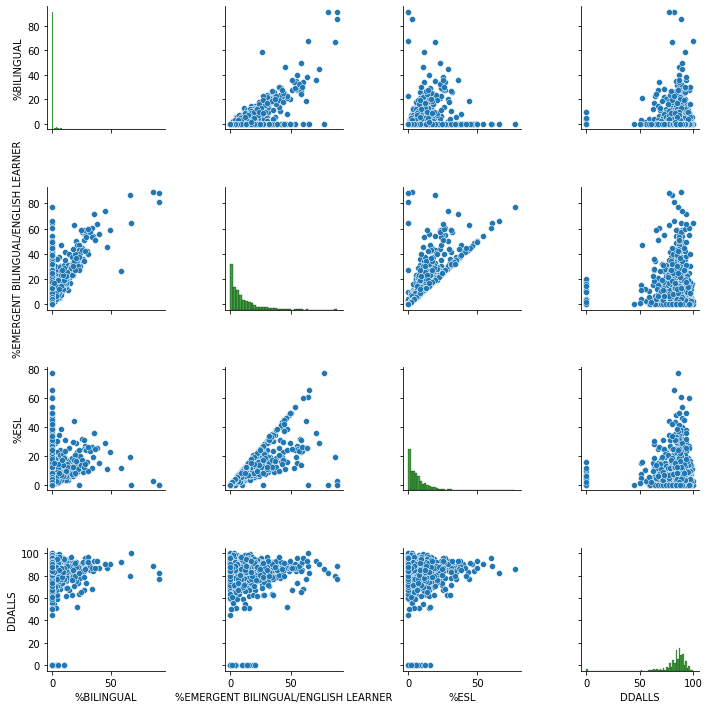

In [100]:
sns.pairplot(corr_df_subset, vars=['%BILINGUAL', '%EMERGENT BILINGUAL/ENGLISH LEARNER', '%ESL', 'DDALLS'], diag_kws={'color':'green'})

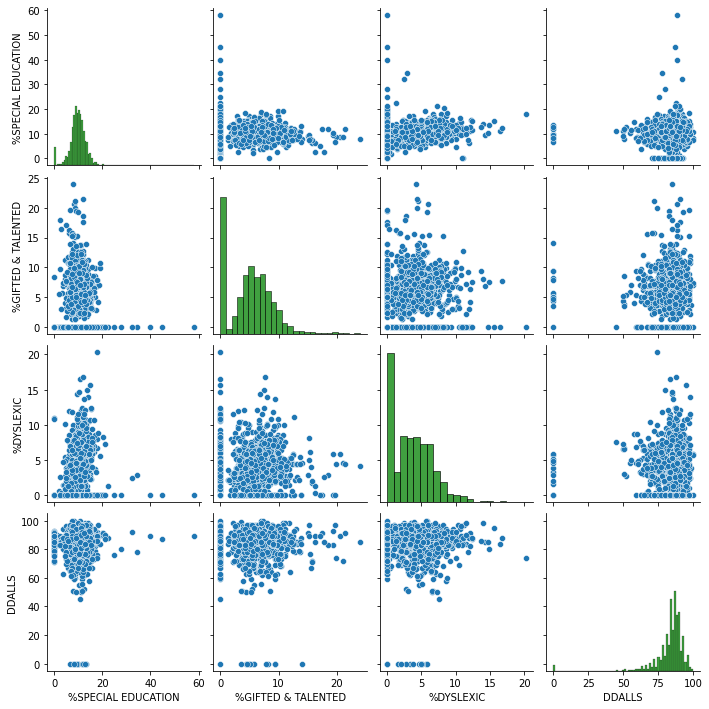

In [101]:
sns.pairplot(corr_df_subset, vars=['%SPECIAL EDUCATION', '%GIFTED & TALENTED','%DYSLEXIC', 'DDALLS'], diag_kws={'color':'green'})

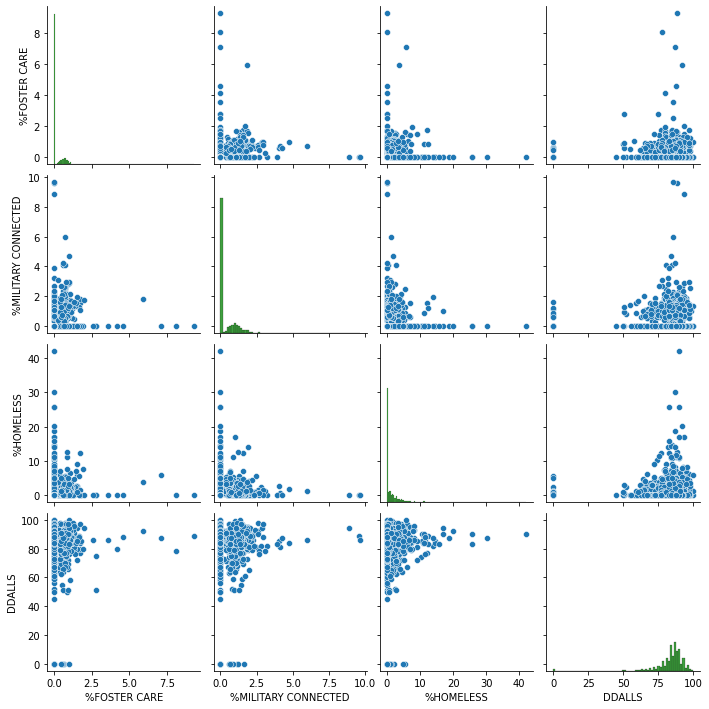

In [102]:
sns.pairplot(corr_df_subset, vars=['%FOSTER CARE', '%MILITARY CONNECTED', '%HOMELESS', 'DDALLS'], diag_kws={'color':'green'})

In [103]:
def describe_stats(df, col_name):
    print(f"\nColumn: {col_name}")
    print(f"Minimum: {df[col_name].min()}")
    print(f"Maximum: {round(df[col_name].max(),2)}")
    print(f"Average: {round(df[col_name].mean(),2)}")
    print(f"Median: {round(df[col_name].median(),2)}")
    print(f"Standard Deviation: {round(df[col_name].std(), 3)}")
    print(f"Variance: {round(df[col_name].var(), 3)}")

In [104]:
# target variable statistics
describe_stats(corr_df_subset, 'DDALLS')


Column: DDALLS
Minimum: 0.0
Maximum: 100.0
Average: 84.12
Median: 86.0
Standard Deviation: 11.581
Variance: 134.12


In [105]:
describe_stats(corr_df_subset, '%AT RISK')


Column: %AT RISK
Minimum: 0.0
Maximum: 100.0
Average: 44.39
Median: 43.82
Standard Deviation: 17.734
Variance: 314.486


In [106]:
describe_stats(corr_df_subset, '%ECONOMICALLY DISADVANTAGED')


Column: %ECONOMICALLY DISADVANTAGED
Minimum: 0.0
Maximum: 100.0
Average: 60.55
Median: 62.06
Standard Deviation: 21.117
Variance: 445.908


In [107]:
describe_stats(corr_df_subset, '%CTE')


Column: %CTE
Minimum: 0.0
Maximum: 99.3
Average: 27.53
Median: 29.05
Standard Deviation: 12.791
Variance: 163.61


In [108]:
describe_stats(corr_df_subset, '%BILINGUAL')


Column: %BILINGUAL
Minimum: 0.0
Maximum: 91.67
Average: 3.17
Median: 0.0
Standard Deviation: 8.398
Variance: 70.531


In [109]:
describe_stats(corr_df_subset, '%EMERGENT BILINGUAL/ENGLISH LEARNER')


Column: %EMERGENT BILINGUAL/ENGLISH LEARNER
Minimum: 0.0
Maximum: 88.75
Average: 10.95
Median: 6.28
Standard Deviation: 13.447
Variance: 180.829


In [110]:
describe_stats(corr_df_subset, '%ESL')


Column: %ESL
Minimum: 0.0
Maximum: 77.38
Average: 7.63
Median: 5.1
Standard Deviation: 8.907
Variance: 79.332


In [111]:
describe_stats(corr_df_subset, '%FOSTER CARE')


Column: %FOSTER CARE
Minimum: 0.0
Maximum: 9.28
Average: 0.24
Median: 0.0
Standard Deviation: 0.612
Variance: 0.375


In [112]:
describe_stats(corr_df_subset, '%GIFTED & TALENTED')


Column: %GIFTED & TALENTED
Minimum: 0.0
Maximum: 24.04
Average: 5.11
Median: 5.29
Standard Deviation: 3.883
Variance: 15.078


In [113]:
describe_stats(corr_df_subset, '%HOMELESS')


Column: %HOMELESS
Minimum: 0.0
Maximum: 42.17
Average: 1.4
Median: 0.0
Standard Deviation: 2.994
Variance: 8.964


In [114]:
describe_stats(corr_df_subset, '%MILITARY CONNECTED')


Column: %MILITARY CONNECTED
Minimum: 0.0
Maximum: 9.65
Average: 0.43
Median: 0.0
Standard Deviation: 0.815
Variance: 0.665


In [115]:
describe_stats(corr_df_subset, '%SPECIAL EDUCATION')


Column: %SPECIAL EDUCATION
Minimum: 0.0
Maximum: 57.95
Average: 10.04
Median: 9.95
Standard Deviation: 4.031
Variance: 16.247


In [116]:
describe_stats(corr_df_subset, '%DYSLEXIC') 


Column: %DYSLEXIC
Minimum: 0.0
Maximum: 20.33
Average: 3.69
Median: 3.54
Standard Deviation: 3.084
Variance: 9.509


In [117]:
describe_stats(corr_df_subset, '%TITLE I')


Column: %TITLE I
Minimum: 0.0
Maximum: 100.0
Average: 77.53
Median: 99.89
Standard Deviation: 31.271
Variance: 977.849


In [118]:
# correlation coefficients: kendall
corr_df_subset.corr(method='kendall')

,%AT RISK,%CTE,%BILINGUAL,%DYSLEXIC,%ECONOMICALLY DISADVANTAGED,%EMERGENT BILINGUAL/ENGLISH LEARNER,%ESL,%FOSTER CARE,%GIFTED & TALENTED,%HOMELESS,%MILITARY CONNECTED,%SPECIAL EDUCATION,%TITLE I,DDALLS
%AT RISK,1.000000,-0.011931,0.321930,-0.081828,0.482655,0.370437,0.312999,0.144137,-0.077734,0.255819,-0.025548,0.069571,0.168655,0.017694
%CTE,-0.011931,1.000000,-0.108876,0.131366,-0.024221,-0.160651,-0.137609,-0.029061,0.043313,-0.020718,-0.073842,0.157408,0.076403,-0.032422
%BILINGUAL,0.321930,-0.108876,1.000000,-0.033621,0.180656,0.504950,0.306125,0.356885,0.142050,0.250505,0.292272,-0.089578,-0.124900,-0.015596
%DYSLEXIC,-0.081828,0.131366,-0.033621,1.000000,-0.179564,-0.111038,-0.094406,0.113224,0.224994,0.108886,0.120974,0.166033,-0.109324,0.000340
%ECONOMICALLY DISADVANTAGED,0.482655,-0.024221,0.180656,-0.179564,1.000000,0.285253,0.254614,-0.001516,-0.145317,0.122086,-0.165424,0.077803,0.343218,0.016161
%EMERGENT BILINGUAL/ENGLISH LEARNER,0.370437,-0.160651,0.504950,-0.111038,0.285253,1.000000,0.842706,0.145522,0.045286,0.174248,0.085425,-0.134787,0.013250,-0.030730
%ESL,0.312999,-0.137609,0.306125,-0.094406,0.254614,0.842706,1.000000,0.077519,0.031439,0.149439,0.021206,-0.118596,0.038049,-0.032710
%FOSTER CARE,0.144137,-0.029061,0.356885,0.113224,-0.001516,0.145522,0.077519,1.000000,0.146440,0.274770,0.451010,0.090377,-0.201806,0.007451
%GIFTED & TALENTED,-0.077734,0.043313,0.142050,0.224994,-0.145317,0.045286,0.031439,0.146440,1.000000,0.132664,0.226207,0.032693,-0.162706,-0.008886
%HOMELESS,0.255819,-0.020718,0.250505,0.108886,0.122086,0.174248,0.149439,0.274770,0.132664,1.000000,0.214283,0.094295,-0.049397,-0.008261


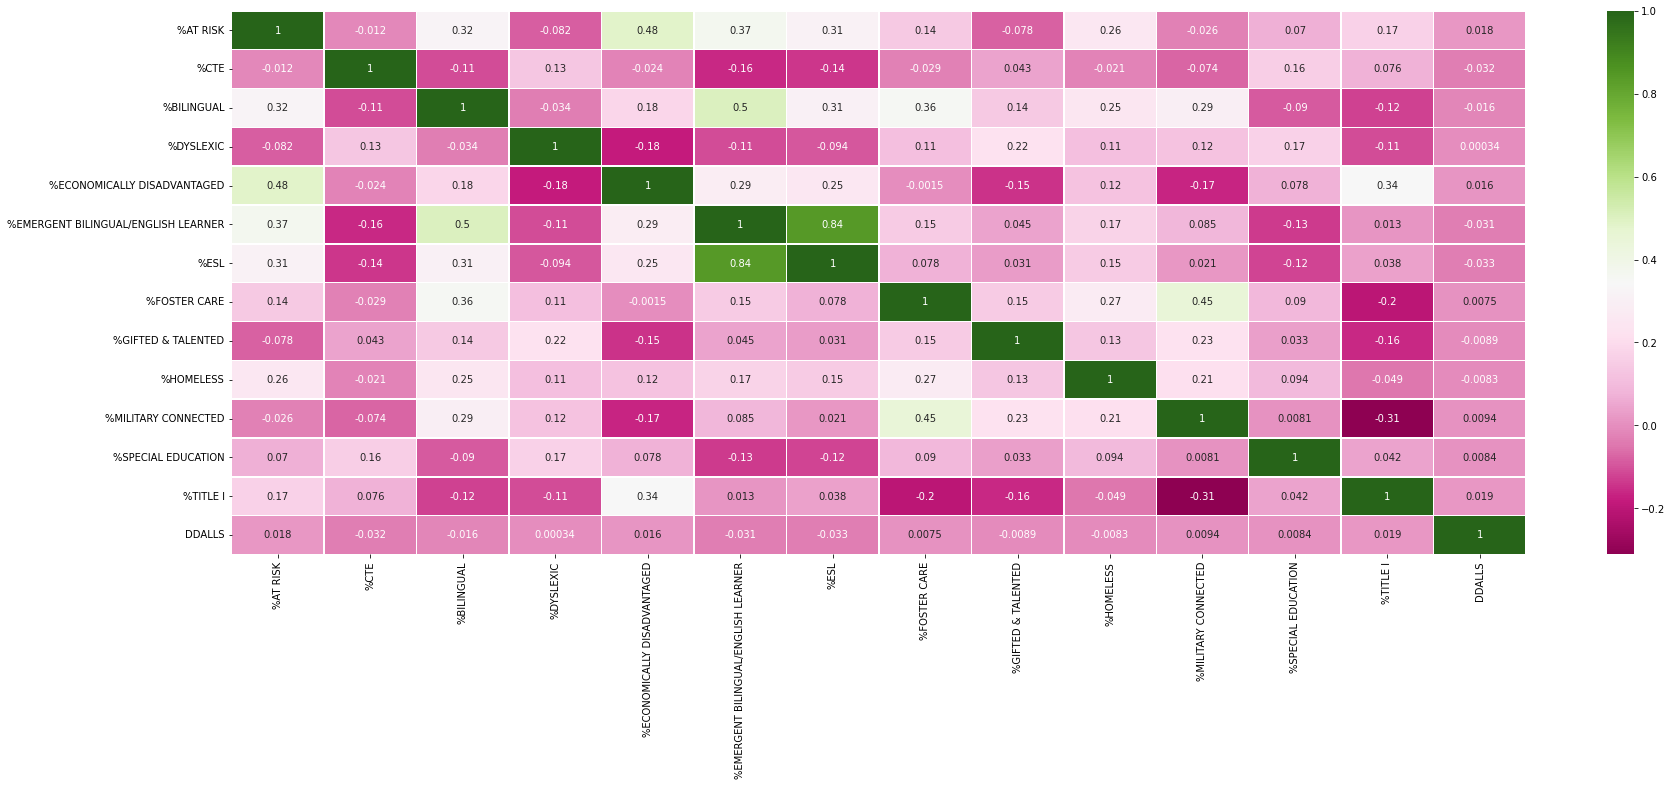

In [127]:
# correlation coefficients: pearson
plt.figure(figsize=(29, 10))
sns.heatmap(corr_df_subset.corr(method='kendall'), annot=True, cmap="PiYG", linewidth=.5)

### Regression Model Metric Functions

In [60]:
def mse(y_actual, x_calculated): 
    actual, x_calculated = np.array(actual), np.array(x_calculated)
    return np.square(np.subtract(actual, x_calculated)).mean() 

In [61]:
def mae(y_actual, x_calculated):
   y_actual, calculated = np.array(y_actual), np.array(x_calculated)
   return np.mean(abs(np.subtract(y_actual, x_calculated)))

In [62]:
def rmse(y_actual, x_calculated): 
    y_actual, calculated = np.array(y_actual), np.array(x_calculated)
    return np.sqrt(np.square(np.subtract(y_actual, x_calculated)).mean())	

In [63]:
def r2(y_actual, x_calculated): 
    y_actual, calculated = np.array(y_actual), np.array(x_calculated)
    return 1-(sum(np.subtract(y_actual, x_calculated)**2)/sum((y_actual-np.mean(y_actual))**2))    

### Observations

1. Many of the groups had several entries with -999 that symbolized protected data  (highest). Foster care: 473, Military connected: 460, Homeless: 310, Dyslexic: 217
2. For the histograms %AT RISK is normally distributed slightly positive and %ECONOMICALLY DISADVANTAGED is also normally distributed but slightly negative.
3. As expected, based on masked values and histograms %MILITARY CONNECTED and %FOSTER CARE are highly skewed (positively).
4. Scatter plots - the language populations (%BILINGUAL, %EMERGENT BILINGUAL/ENGLISH LEARNER, %ESL) are similarily shaped in relationship to DDALLS.
5. From the heatmap comparing DDALLS with the %GIFTED & TALENTED, %BILINGUAL, %EMERGENT BILINGUAL/ENGLISH LEARNER, %CTE, %ESL population groups there is a negative correlation. The population group for %HOMELESS is slightly negatively correlated, but it should be noted that due to the amount of masked values and skewness in the data that be the cause of the negative correlation. More data might be helpful in determining if that is actually the case. 







Extension : Looker/Tableau Dashboard or stremlit app

ToDo ...